### IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from mlxtend.plotting import plot_decision_regions

### LOAD DATASETS

In [2]:
data=pd.read_csv(r"C:\Users\daljeet\Downloads\archive\Titanic-Dataset.csv")

In [3]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

### CHECK INFORMATION 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### CHECK INFORMATION 

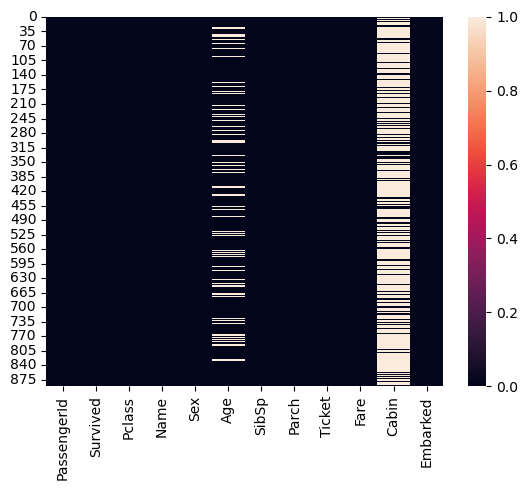

In [6]:
sns.heatmap(data.isnull())
plt.show()

In [7]:
data.isnull().sum()/data.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

### ENCODING

In [8]:
for i in data.select_dtypes(include='object').columns:
    data[i]=LabelEncoder().fit_transform(data[i])

### CORRELATION 

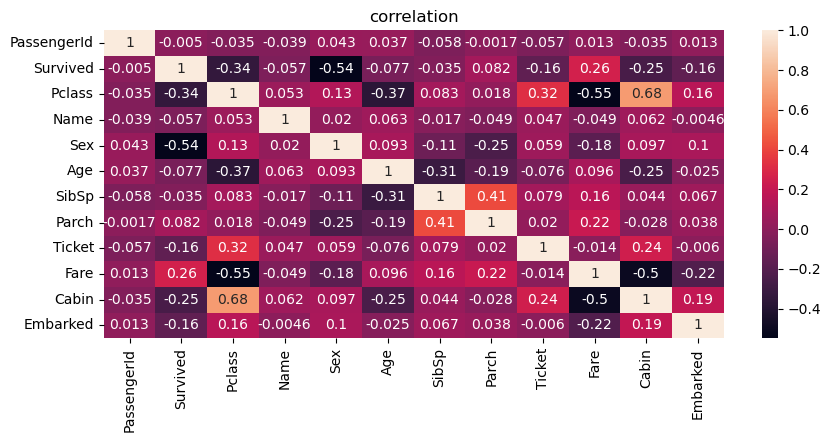

In [9]:
plt.figure(figsize=(10,4))
sns.heatmap(data.corr(),annot=True)
plt.title("correlation")
plt.show()

### DATA HANDLING

In [10]:

data=data.drop('Cabin',axis=1)

In [11]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,2


In [12]:
data['Age'].fillna(data['Age'].mode()[0],inplace=True)

In [13]:
data['Embarked'].fillna(method='bfill',inplace=True)

In [14]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
data.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,445.000000,0.647587,28.566970,0.523008,0.381594,338.528620,32.204208,1.538721
std,257.353842,0.486592,0.836071,257.353842,0.477990,13.199572,1.102743,0.806057,200.850657,49.693429,0.794231
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,222.500000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,445.000000,1.000000,24.000000,0.000000,0.000000,337.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,667.500000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,2.000000
max,891.000000,1.000000,3.000000,890.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,3.000000


### DATA VISUALIZATION

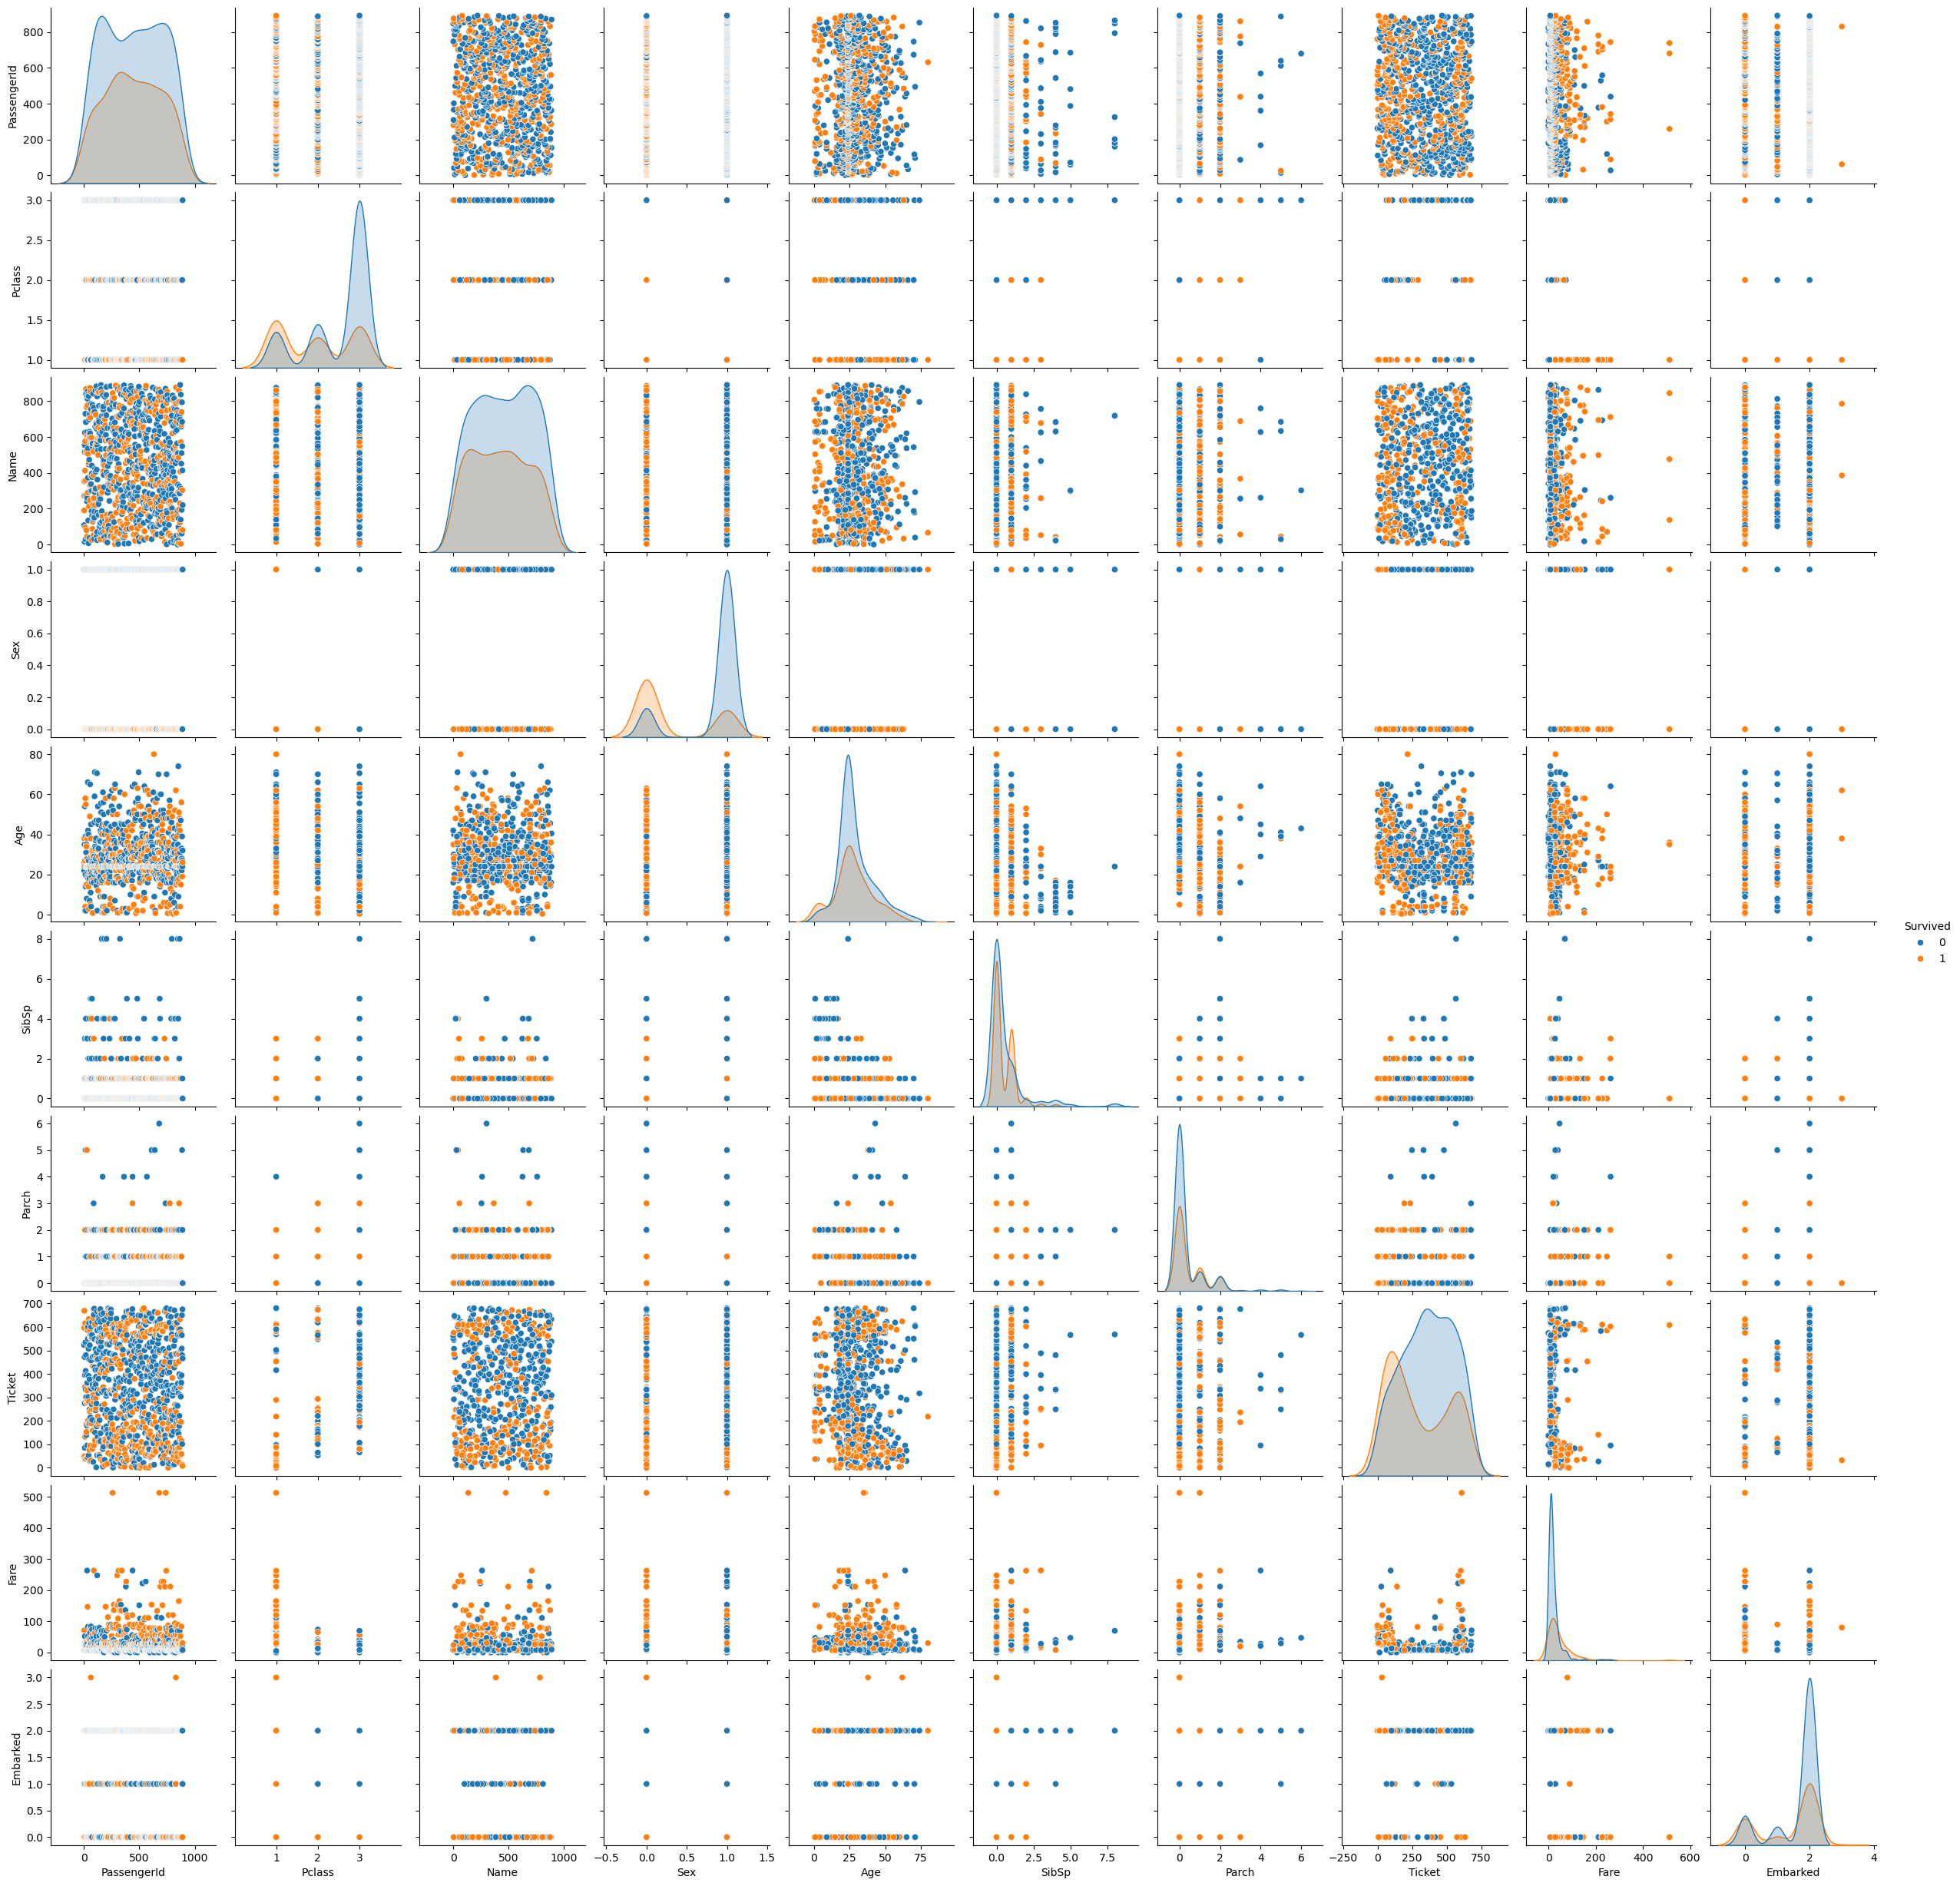

In [16]:
sns.pairplot(data,hue='Survived')
plt.show()

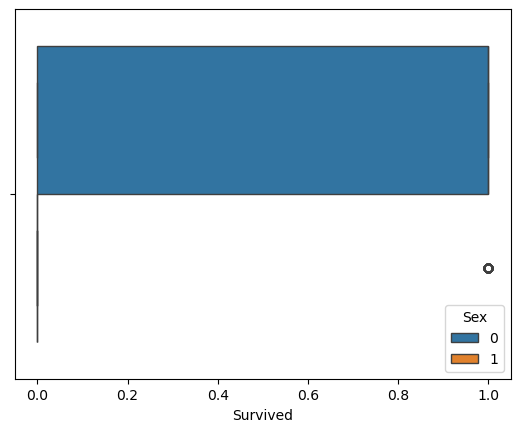

In [17]:
sns.boxplot(x = 'Survived',hue = 'Sex', data = data)
plt.show()

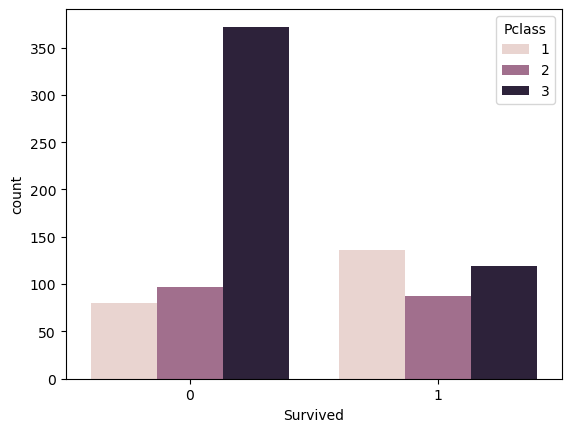

In [18]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = data)
plt.show()

### SPLITTING

In [19]:
x=data.drop('Survived',axis=1)
y=data['Survived']


### SCALING

In [20]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=['PassengerId','Pclass'	,'Name',	'Sex',	'Age',	'SibSp'	,'Parch',	'Ticket',	'Fare'	,'Embarked'])


In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### POLYNOMIAL FEATURES

In [22]:
poly = PolynomialFeatures(degree=2) 
x_train_p= poly.fit_transform(x_train)  
x_test_p = poly.fit_transform(x_test)

### MODEL

In [30]:
model=LogisticRegression(max_iter= 150,
 multi_class= 'multinomial',
 penalty= 'l2',
 random_state= 100,
 solver= 'sag')

### HYPER PARAMETER TUNNING

In [24]:
param_grid = {
    'penalty': ['l1', 'l2'], 
    'random_state': [42,100,None], 
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter' : [10,50,100,150,None],
    'multi_class' : ['auto', 'ovr', 'multinomial']
    
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid ,cv=5 , scoring='accuracy')
grid_search.fit(x_train_p, y_train)
grid_search.best_params_

{'max_iter': 150,
 'multi_class': 'multinomial',
 'penalty': 'l2',
 'random_state': 100,
 'solver': 'sag'}

### TRAINNING DATASETS

In [31]:
model.fit(x_train_p,y_train)

LogisticRegression(max_iter=150, multi_class='multinomial', random_state=100,
                   solver='sag')

### TRAIN ACCURACY

In [32]:
y_pred_training =model.predict(x_train_p)
accuracy_score(y_train,y_pred_training)*100

84.8314606741573

### TESTING ACCURACY

In [33]:
y_pred_testing=model.predict(x_test_p)
accuracy_score(y_test,y_pred_testing)*100

81.56424581005587

### CONFUSION MATRIX

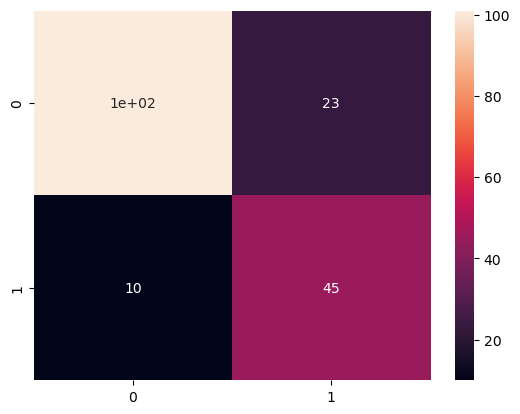

In [34]:
cf=confusion_matrix(y_pred_testing,y_test)
sns.heatmap(cf,annot=True)
plt.show()

### PLOT DECISION REGIONS FOR TRAINING AND TESTING

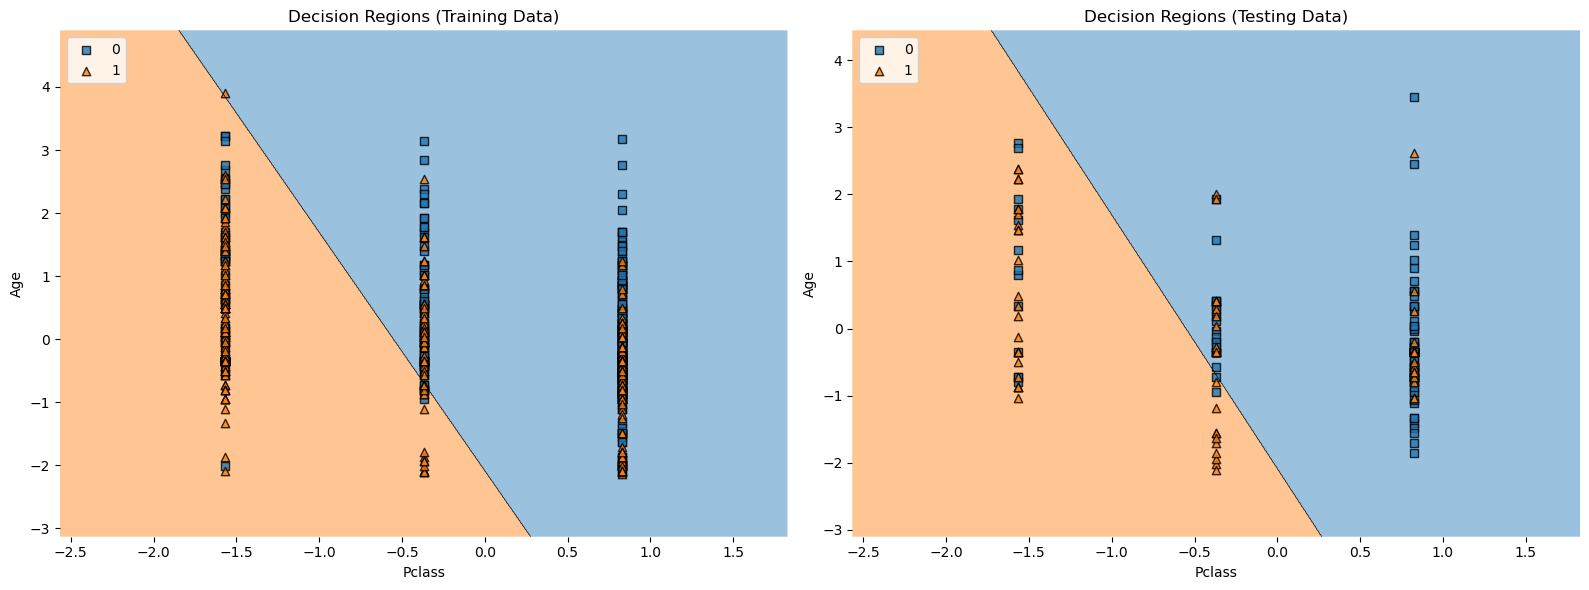

In [29]:
X_train_2d=x_train[['Pclass','Age']]
model.fit(X_train_2d,y_train)

X_test_2d=x_test[['Pclass','Age']]
model.fit(X_test_2d,y_test)



fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].set_title('Decision Regions (Training Data)')

plot_decision_regions(X_train_2d.to_numpy(), y_train.to_numpy(), model, ax=axes[0])
axes[0].set_xlabel('Pclass')
axes[0].set_ylabel('Age')




axes[0].legend(loc='upper left')

axes[1].set_title('Decision Regions (Testing Data)')
plot_decision_regions(X_test_2d.to_numpy(), y_test.to_numpy(), model, ax=axes[1])
axes[1].set_xlabel('Pclass')
axes[1].set_ylabel('Age')
axes[1].legend(loc='upper left')

plt.tight_layout()
plt.show()